# Regular expressions

From Data Science perspective RE is used to clean noise on text data (used in pre-processing of text analytics), to make data useful for analysis purpose-finding pattern in data.

## What is Regular Expression?

A regular expression is a group of characters or symbols which is used to find a specific pattern in a text.

A regular expression is a pattern that is matched against a subject string from left to right. 
- usually  the term abbreviated to "regex" or "regexp".

## Whats the purpose of regular expressions?

Regular Expressions are extensively used for:
       
       **1.To Extract insights about the text ->  re.findall()**
        **2.To Clean the text -> re.sub()**
        

Basic meta charecters used in regular expressions

    . -> matches a single character
    * -> matches zero or more occourrence of the previous charecter
    + -> matches one or more occourrence of the previous charecter
    ^ -> matches any character start of a string
    $ -> matches any character end of a string
    [] -> matches one of the set of characters within []
    [a-z] -> matches on of the range of characters in lowercase alphabet
    [^abc] -> matches a character that is not a, b, or c

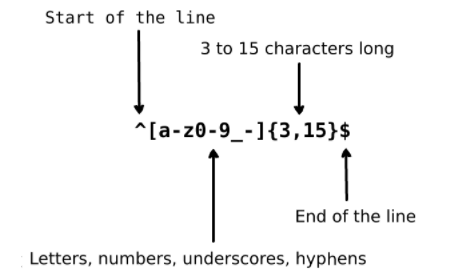

# Understanding meta characters

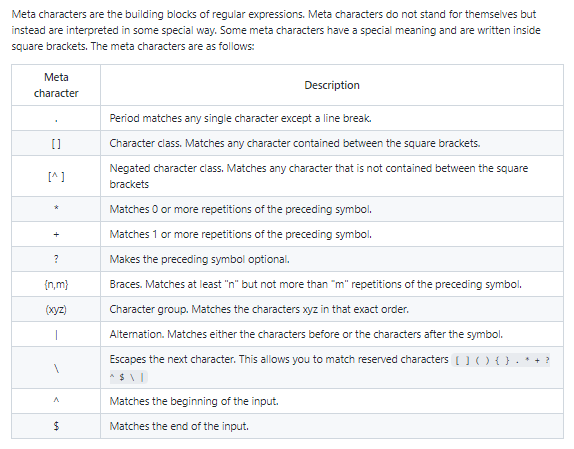

In [1]:
import re
import pandas as pd

In [2]:
text = 'Around 2500 Patients are a taking_part in clinical trails #Coronavirus'

## Finding patterns/insights from data using findall()

### findall()

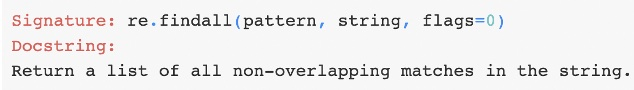

In [3]:
# with + # [a-z] only lowercase letters will be detected
print(text)
print('\n',re.findall('[a-z]+', text)) # Find all sequency of lower case characters

Around 2500 Patients are a taking_part in clinical trails #Coronavirus

 ['round', 'atients', 'are', 'a', 'taking', 'part', 'in', 'clinical', 'trails', 'oronavirus']


In [4]:
# without + means without sequence
print(text)
print(re.findall('[a-z]', text))

Around 2500 Patients are a taking_part in clinical trails #Coronavirus
['r', 'o', 'u', 'n', 'd', 'a', 't', 'i', 'e', 'n', 't', 's', 'a', 'r', 'e', 'a', 't', 'a', 'k', 'i', 'n', 'g', 'p', 'a', 'r', 't', 'i', 'n', 'c', 'l', 'i', 'n', 'i', 'c', 'a', 'l', 't', 'r', 'a', 'i', 'l', 's', 'o', 'r', 'o', 'n', 'a', 'v', 'i', 'r', 'u', 's']


In [5]:
print(text)
print(re.findall('[a-zA-Z]+', text)) # Find all sequency of lower & upper case characters

Around 2500 Patients are a taking_part in clinical trails #Coronavirus
['Around', 'Patients', 'are', 'a', 'taking', 'part', 'in', 'clinical', 'trails', 'Coronavirus']


In [6]:
print(re.findall('[a-zA-Z]', text))

['A', 'r', 'o', 'u', 'n', 'd', 'P', 'a', 't', 'i', 'e', 'n', 't', 's', 'a', 'r', 'e', 'a', 't', 'a', 'k', 'i', 'n', 'g', 'p', 'a', 'r', 't', 'i', 'n', 'c', 'l', 'i', 'n', 'i', 'c', 'a', 'l', 't', 'r', 'a', 'i', 'l', 's', 'C', 'o', 'r', 'o', 'n', 'a', 'v', 'i', 'r', 'u', 's']


In [7]:
print(text)
re.findall('[^a-zA-Z]+', text)

Around 2500 Patients are a taking_part in clinical trails #Coronavirus


[' 2500 ', ' ', ' ', ' ', '_', ' ', ' ', ' ', ' #']

 Extended Regular Expressions:
 
    \d -> Any digit, equivalent to [0-9]
    \D -> Any non-digit, equivalent to [^0-9]
    \w -> Any alphanumeric, equivalent to [a-zA-Z0-9_]
    \W -> Non-alphanumeric, equivalent to [^a-zA-Z0-9_]
    \s -> Any whitespace character
    \S -> Any nonwhitespace character
    
    () -> Scoping for extraction
    {} -> Frequency for extraction
    ? -> Make a pattern non greedy

**Note** 
- () -> Scoping for extraction
- {} -> Frequency for extraction

In [8]:
print(text)

Around 2500 Patients are a taking_part in clinical trails #Coronavirus


In [9]:
print(re.findall('\w+', text)) # Find all sequency of word characters[a-zA-Z0-9_]

['Around', '2500', 'Patients', 'are', 'a', 'taking_part', 'in', 'clinical', 'trails', 'Coronavirus']


In [10]:
text1 = "The film Titanic was released in year 98 and was a hit till the year 2000 \n5000 was the cost of the mobile\ni baragined it to "

In [11]:
print(text1)

The film Titanic was released in year 98 and was a hit till the year 2000 
5000 was the cost of the mobile
i baragined it to 


In [12]:
patterns = re.findall("\d+",text1)
print(patterns)

['98', '2000', '5000']


In [13]:
patterns = re.findall("\d",text1)
print(patterns)

['9', '8', '2', '0', '0', '0', '5', '0', '0', '0']


In [14]:
for line in text1.splitlines(): # split string into list of lines
    patterns = re.findall("\d+",line) # now pattern will be checked not on text but on lines
    if len(patterns)>0:
        print(patterns)

['98', '2000']
['5000']


In [15]:
for line in text1.splitlines(): # split string into list of lines
    patterns = re.findall("\d+",line) # now pattern will be checked not on text but on lines
    print(patterns)

['98', '2000']
['5000']
[]


**Note**

- Here if carot ^ within bracket then ^ means not concept.
- If ^ not within bracket, then ^ means beginning of input.

In [16]:
for line in text1.splitlines():
    patterns = re.findall("^\d+",line)    
    print(patterns)                       

[]
['5000']
[]


In [17]:
print(text1,'\n')
for line in text1.splitlines():            
    patterns = re.findall("[^\d]+",line)   # here carot within bracket means not concept
    print(patterns)                        # anything except digits is displayed.

The film Titanic was released in year 98 and was a hit till the year 2000 
5000 was the cost of the mobile
i baragined it to  

['The film Titanic was released in year ', ' and was a hit till the year ', ' ']
[' was the cost of the mobile']
['i baragined it to ']


In [18]:
for line in text1.splitlines():
    patterns = re.findall("[^\d]",line)   # here carot within bracket means not concept
    print(patterns) 

['T', 'h', 'e', ' ', 'f', 'i', 'l', 'm', ' ', 'T', 'i', 't', 'a', 'n', 'i', 'c', ' ', 'w', 'a', 's', ' ', 'r', 'e', 'l', 'e', 'a', 's', 'e', 'd', ' ', 'i', 'n', ' ', 'y', 'e', 'a', 'r', ' ', ' ', 'a', 'n', 'd', ' ', 'w', 'a', 's', ' ', 'a', ' ', 'h', 'i', 't', ' ', 't', 'i', 'l', 'l', ' ', 't', 'h', 'e', ' ', 'y', 'e', 'a', 'r', ' ', ' ']
[' ', 'w', 'a', 's', ' ', 't', 'h', 'e', ' ', 'c', 'o', 's', 't', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'm', 'o', 'b', 'i', 'l', 'e']
['i', ' ', 'b', 'a', 'r', 'a', 'g', 'i', 'n', 'e', 'd', ' ', 'i', 't', ' ', 't', 'o', ' ']


In [19]:
print(text1)

The film Titanic was released in year 98 and was a hit till the year 2000 
5000 was the cost of the mobile
i baragined it to 


In [20]:
for line in text1.splitlines():
    line = line.strip()   #Returns copy of string with leading and trailing whitespace removed.
    patterns = re.findall("\d+$",line)  # $ matches the end of input
    #if len(patterns)>0:
    print(patterns)
        
#Python strip() method removes any spaces or specified characters at the start and end of a string

['2000']
[]
[]


In [21]:
for line in text1.splitlines():
    patterns = re.findall("\d{2,4}",line)    # {} -> Frequency for extraction
    if len(patterns)>0:
        print(patterns)

['98', '2000']
['5000']


In [22]:
text2 = 'A message from c-jayesh.p@timesgroup.com to dmslb6@iupui.edu about session @4pM'
text2

'A message from c-jayesh.p@timesgroup.com to dmslb6@iupui.edu about session @4pM'

In [23]:
re.findall("\S+@\S+", text2)

['c-jayesh.p@timesgroup.com', 'dmslb6@iupui.edu']

In [24]:
re.findall("\s+@\S+", text2)

[' @4pM']

In [25]:
re.findall("\S+@(\S+)", text2)    # () -> Scoping for extraction, so only after @ part extract


['timesgroup.com', 'iupui.edu']

In [26]:
re.findall("(\S+)@\S+", text2)

['c-jayesh.p', 'dmslb6']

## Cleaning text using re.sub

In [27]:
text3 = 'Around 2,500 patients are taking part in clinical trails #Coronavirus'

### sub()

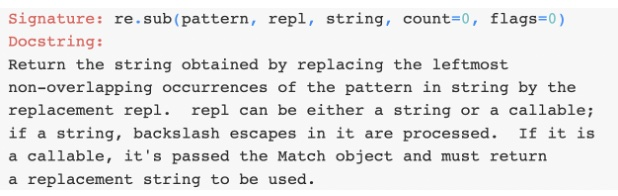

In [28]:
print(text3)

Around 2,500 patients are taking part in clinical trails #Coronavirus


In [29]:
re.sub('[^\w]', '', text3) # basically if not aphanumeric character replacement with '' nothing

# whitespace, comma and # are not alphanumeric so replace with nothing

'Around2500patientsaretakingpartinclinicaltrailsCoronavirus'

In [30]:
re.sub('[^\w]', ' ', text3) # or [\W]     # ^ within bracket means not concept

# If not an alphanumeric character replace it with space, so space replaced with space
# itself and , and # also replaced with space.

'Around 2 500 patients are taking part in clinical trails  Coronavirus'

In [31]:
print(text3)

Around 2,500 patients are taking part in clinical trails #Coronavirus


In [32]:
re.sub('[^\w\s]', '', text3)  # not alphanumeric & not whitespace replace with nothing

# Only comma and # replaced with nothing

'Around 2500 patients are taking part in clinical trails Coronavirus'

In [33]:
text4 = "film ABC  @ was ? produced %  in , year $ 1994  .  'by'   Mr_X"
text4

"film ABC  @ was ? produced %  in , year $ 1994  .  'by'   Mr_X"

In [34]:
#Removing special charecters with nothing
result1 = re.sub("[,@'?.$%_]", "", text4)
result1

'film ABC   was  produced   in  year  1994    by   MrX'

In [35]:
#Removing special charecters(non Alpha numeric and Space) with nothing
result2 = re.sub("[^a-zA-Z0-9 ]","",text4)
result2

'film ABC   was  produced   in  year  1994    by   MrX'

In [36]:
# \w -> Alphanumeric with underscores
#\s -> Space
result3 = re.sub("[^\w\s]","",text4)   # _ included in \w 
result3

'film ABC   was  produced   in  year  1994    by   Mr_X'

In [37]:
print(text4)

film ABC  @ was ? produced %  in , year $ 1994  .  'by'   Mr_X


In [38]:
#Removing multiple spaces with a single space
result4 = re.sub("\s+", " ", result1)
result4

'film ABC was produced in year 1994 by MrX'

## Cleaning salary from Naukri Job dataset

In [39]:
jobs_df = pd.read_csv('datascience_jobs.csv')
jobs_df.head(5)

# Columns salary and experience have noise. We want to remove like hyphen or remove unnecessary
# text like yrs in experience, just have int data that can be used for analysis.
# e.g. extract min year or max year or just use an average year. So cleaning the text or 
# getting insights from the data from columns like experience and salary.

,title,location,experience,skills,company,salary,description,posted_date
0,Data Science,Mumbai,2-4 yrs,"Algorithms, Machine Learning, Python, Java, Da...",Netcore Solutions Pvt Ltd,"2,00,000 - 7,00,000 P.A.",At least 2 year of experience in data engineer...,1 day ago
1,Analyst / Sr. Analyst (data Science),Gurgaon,5-8 yrs,"predictive modeling, predictive analytics, mac...",Cvent India Pvt. Ltd.,"5,00,000 - 10,00,000 P.A.",Strong experience on providing predictive mode...,Today
2,ETL Lead & Data Science,"Chennai, Bengaluru, Mumbai, Pune, Noida",7-10 yrs,"SQL, Data Analysis, Text Mining, SAS, R, Stati...",COMPUTER POWER GROUP PRIVATE LIMITED,"10,00,000 - 15,00,000 P.A.",Industry experience in building and operationa...,1 day ago
3,Specialist - Data Science,"Delhi NCR, Bengaluru, Gurgaon",7-12 yrs,"Specialist - Data Science, Data Science, data ...",Brainsearch Consulting Pvt Ltd.Â,Not disclosed,- Experience with one or more data science pro...,1 day ago
4,Group Manager - Data Science - Python/nlp,Bengaluru,6-11 yrs,"machine learning, text mining, r, nlp, data sc...",Staffio HR,Not disclosed,- This is a Team management role - Skill set ...,1 day ago


##### Task : From the salary column extract the minimum and maximum salary, NA if unable to extract

In [40]:
jobs_df['salary'].isnull().sum()

0

In [41]:
# Sample exercise 
salary = '5,00,000 - 10,00,000 P.A.'
salary1 = salary.replace(",","")
salary1

'500000 - 1000000 P.A.'

In [42]:
#min_sal = re.findall('[0-9]+ - [0-9]+ P.A.',salary)
min_sal = re.findall('([0-9]+) - [0-9]+ P.A.',salary1) 

min_sal   # Scoping on ([0-9]+) so it just get the first number

['500000']

In [43]:
max_sal = re.findall('[0-9]+ - ([0-9]+) P.A.',salary1)
max_sal 

['1000000']

In [44]:
# Back to Job dataframe
jobs_df['salary'].head(n=5)

0          2,00,000 - 7,00,000 P.A.  
1         5,00,000 - 10,00,000 P.A.  
2        10,00,000 - 15,00,000 P.A.  
3                      Not disclosed 
4                      Not disclosed 
Name: salary, dtype: object

We use the len() to check if a list is empty, this function returns the length of the argument passed. And given the length of an empty list is 0 it can be used to check if a list is empty in Python.

In [45]:
def get_salary_min(row):
    row = row.replace(',', '')
    pattern_min = '([0-9]+) - [0-9]+ P.A.'
    salary_min = re.findall(pattern_min, row)
    if len(salary_min):
        return salary_min[0]
    else:
        return 'No pattern found'
    

In [46]:
jobs_df['salary_min'] = jobs_df['salary'].apply(get_salary_min)
jobs_df['salary_min'][0:5]

0              200000
1              500000
2             1000000
3    No pattern found
4    No pattern found
Name: salary_min, dtype: object

In [47]:
jobs_df['salary_min'] = pd.to_numeric(jobs_df['salary_min'],
                                  errors='coerce')
jobs_df['salary_min'][0:5]

# Using errors='coerce'. It will replace all non-numeric values with NaN.

0     200000.0
1     500000.0
2    1000000.0
3          NaN
4          NaN
Name: salary_min, dtype: float64

In [48]:
#list1 = []

def get_salary_max(dfcol_name):
    list1 = []
    for i in dfcol_name:
        i = i.replace(',', '')
        pattern_max = '[0-9]+ - ([0-9]+) P.A.'
        salary_max = re.findall(pattern_max, i)
        if len(salary_max):
            list1.append(salary_max[0])
        else:
            list1.append('No pattern found')
    return list1
    

In [49]:
jobs_df['salary_max'] = get_salary_max(jobs_df['salary'])
jobs_df['salary_max'][0:5]


0              700000
1             1000000
2             1500000
3    No pattern found
4    No pattern found
Name: salary_max, dtype: object

In [50]:
jobs_df['salary_max'] = pd.to_numeric(jobs_df['salary_max'],
                                  errors='coerce')
jobs_df['salary_max'][0:5]

# Using errors='coerce'. It will replace all non-numeric values with NaN.

0     700000.0
1    1000000.0
2    1500000.0
3          NaN
4          NaN
Name: salary_max, dtype: float64

In [51]:
# Check new columns created
jobs_df[['salary', 'salary_min', 'salary_max']].head()    # Extracting multiple col's, use [[]]

,salary,salary_min,salary_max
0,"2,00,000 - 7,00,000 P.A.",200000.0,700000.0
1,"5,00,000 - 10,00,000 P.A.",500000.0,1000000.0
2,"10,00,000 - 15,00,000 P.A.",1000000.0,1500000.0
3,Not disclosed,NaN,NaN
4,Not disclosed,NaN,NaN


In [52]:
jobs_df['avg_salary'] = (jobs_df['salary_min'] + jobs_df['salary_max'])/2
jobs_df['avg_salary'][0:5]

0     450000.0
1     750000.0
2    1250000.0
3          NaN
4          NaN
Name: avg_salary, dtype: float64

In [53]:
jobs_df[['salary', 'salary_min', 'salary_max','avg_salary']].head()

,salary,salary_min,salary_max,avg_salary
0,"2,00,000 - 7,00,000 P.A.",200000.0,700000.0,450000.0
1,"5,00,000 - 10,00,000 P.A.",500000.0,1000000.0,750000.0
2,"10,00,000 - 15,00,000 P.A.",1000000.0,1500000.0,1250000.0
3,Not disclosed,NaN,NaN,NaN
4,Not disclosed,NaN,NaN,NaN


### Assignment
Extract min, max and avg years of experience from jobs_df['experience']

**Note**<br>
Check for any numerical or null values in dataset column first cz pattern matching function findall() takes pattern along with only string as input.

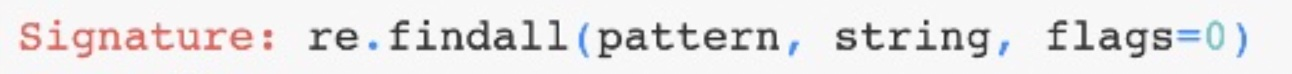

In [54]:
#Assignment
jobs_df['experience'].head()

0     2-4 yrs
1     5-8 yrs
2    7-10 yrs
3    7-12 yrs
4    6-11 yrs
Name: experience, dtype: object

In [55]:
# Check for null values
jobs_df['experience'].isnull().sum()


23

In [56]:
# Replace null values with 'Not disclosed' string as in pattern checking using findall()
# we need input to be a str value

jobs_df['experience'].fillna("Not disclosed", inplace = True)
jobs_df['experience'].isnull().sum()

0

In [57]:
def min_year(row):
    pat = '(\d+)-\d+\syrs'
    min1 = re.findall(pat, row)
    if len(min1):
        return min1[0]
    else:
        return 'Pattern not found'


In [58]:
jobs_df['min_year'] = jobs_df['experience'].apply(min_year)

In [59]:
# Now change jobs_df['min_year'] to int data type so can perform numerical computations

jobs_df['min_year'] = pd.to_numeric(jobs_df['min_year'],
                                  errors='coerce')
jobs_df['min_year'][0:5]

0    2.0
1    5.0
2    7.0
3    7.0
4    6.0
Name: min_year, dtype: float64

In [60]:
def max_year(row):
    pat = '\d+-(\d+)\syrs'
    max1 = re.findall(pat, row)
    if len(max1):
        return max1[0]
    else:
        return 'Pattern not found'

In [61]:
jobs_df['max_year'] = jobs_df['experience'].apply(max_year)

In [62]:
jobs_df['max_year'] = pd.to_numeric(jobs_df['max_year'],
                                  errors='coerce')
jobs_df['max_year'][0:5]

0     4.0
1     8.0
2    10.0
3    12.0
4    11.0
Name: max_year, dtype: float64

In [63]:
jobs_df['avg_yr_exp'] = (jobs_df['max_year'] + jobs_df['min_year'])/2
jobs_df['avg_yr_exp'][0:5]

0    3.0
1    6.5
2    8.5
3    9.5
4    8.5
Name: avg_yr_exp, dtype: float64

In [64]:
jobs_df[['experience', 'min_year', 'max_year','avg_yr_exp']].head()

,experience,min_year,max_year,avg_yr_exp
0,2-4 yrs,2.0,4.0,3.0
1,5-8 yrs,5.0,8.0,6.5
2,7-10 yrs,7.0,10.0,8.5
3,7-12 yrs,7.0,12.0,9.5
4,6-11 yrs,6.0,11.0,8.5


In [65]:
data = pd.read_csv('googleplaystore.csv')

In [66]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [67]:
data['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [68]:
import numpy as np
data['Installs_numeric'] = data['Installs'].apply(lambda row: re.sub('[^0-9]','',row))

In [69]:
data['Installs_numeric']=pd.to_numeric(data['Installs_numeric'])

In [74]:
data['Installs_numeric'].head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs_numeric, dtype: float64

In [70]:
data['Installs_numeric'].isnull().sum()  # as Free would be replaced with nothing '' empty value

1

In [71]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

'\' to escape the next character, so in this case escape . (do not replace . with '')

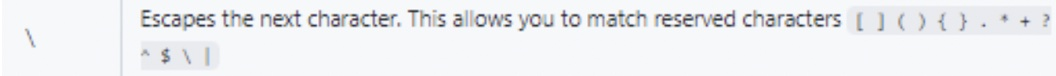

In [72]:
# We want to retain the .

data['Price_numeric'] = data['Price'].apply(lambda v: re.sub('[^0-9\.]', '', v))
data['Price_numeric']=pd.to_numeric(data['Price_numeric'])
data['Price_numeric'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,    nan,   1.2 ,   1.04])

In [73]:
data['Price_numeric'].isnull().sum()

1